1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1) Dataset: Delivery Time

In [60]:
# importing datset
import pandas as pd
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time
pd.set_option("Display.min_rows",None)
delivery_time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [61]:
type(delivery_time)

pandas.core.frame.DataFrame

In [62]:
delivery_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [63]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [64]:
delivery_time.shape

(21, 2)

In [65]:
delivery_time.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [66]:
delivery_time[delivery_time.duplicated()].shape

(0, 2)

In [67]:
delivery_time[delivery_time.duplicated()]

,Delivery_Time,Sorting_Time


<AxesSubplot:>

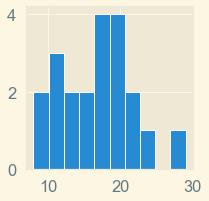

In [68]:
#detecting outliers
delivery_time["Delivery_Time"].hist()

<AxesSubplot:>

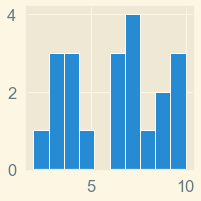

In [69]:
delivery_time["Sorting_Time"].hist()

<AxesSubplot:>

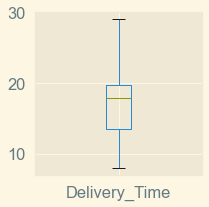

In [70]:
delivery_time.boxplot(["Delivery_Time"])

<AxesSubplot:>

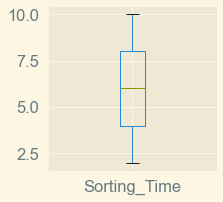

In [71]:
delivery_time.boxplot(["Sorting_Time"])

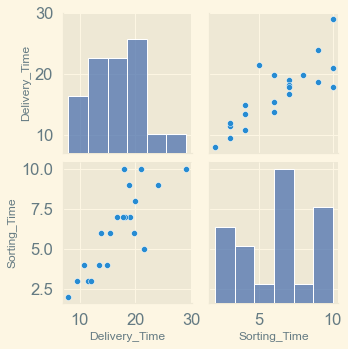

In [72]:
#pairplot
import seaborn as sns
sns.pairplot(delivery_time)

Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:

-Check the kind of each feature distribution

-Check data symmetry

-Verify features frequency

-Identify outliers

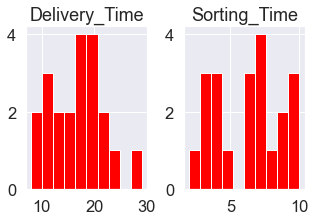

In [73]:
import seaborn as sns
sns.set(style= 'dark', font_scale=1.5, rc= {'figure.figsize':(5,3)})
ax = delivery_time.hist(bins=10, color= 'red')

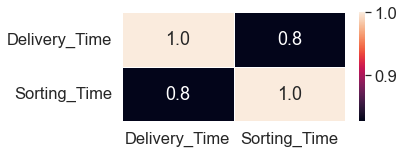

In [74]:
# correlation heatmap
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(5,2))
sns.heatmap(delivery_time.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

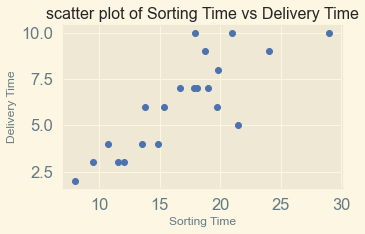

In [75]:
# scatter plot 
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
plt.plot(delivery_time["Delivery_Time"],delivery_time["Sorting_Time"],"bo")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("scatter plot of Sorting Time vs Delivery Time")
plt.show()

here,we can see there is positive correlation and linear association betwen two variables Sorting Time and Delivery Time. 
Also they are directly proportional to each other i.e as Sorting Time increases Delivery Time is also increases.

In [76]:
# correlation
delivery_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


here, correlation value is 0.825997 so there is very strong correlation

In [77]:
# linear model fitting 
import statsmodels.formula.api as smf
linear_model=smf.ols("Delivery_Time ~ Sorting_Time",data=delivery_time).fit()
linear_model

In [78]:
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [79]:
linear_model.rsquared

0.6822714748417231

In [80]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        16:23:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our targeted R-sq should be 75% but here R-sq value is 0.682 i.e 68% so, here error / residual occuered.

In [81]:
# checking error / residuals in the model
linear_model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [82]:
# Giving all the errors.
# we know,
# error= AV-PV
# Predicted value finding 
linear_model_pred=linear_model.predict(pd.DataFrame(delivery_time["Sorting_Time"]))
linear_model_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

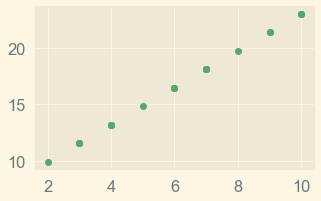

In [83]:
# scatter plot of predicted datapoints
plt.style.use('_classic_test_patch')
plt.plot(delivery_time["Sorting_Time"],linear_model_pred,"go")

In [84]:
# Now, to finding total error, use RMSE (root mean square error)
import numpy as np
linear_model_rmse=np.sqrt(np.mean((np.array(delivery_time["Delivery_Time"])-np.array(linear_model_pred))**2))
linear_model_rmse

2.7916503270617654

Now, i want to increase R-sq value so now i am applying transformation.
Using log transformation, doing same things that was done in above linear model and checking that R-sq value reached to 75% or not.

In [85]:
# log transformation model
model_log=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=delivery_time).fit()
model_log

In [86]:
model_log.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [87]:
model_log.rsquared

0.6954434611324223

In [88]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                        16:23:47   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
model_log.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [90]:
model_log_pred=model_log.predict(pd.DataFrame(delivery_time["Sorting_Time"]))
model_log_pred

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

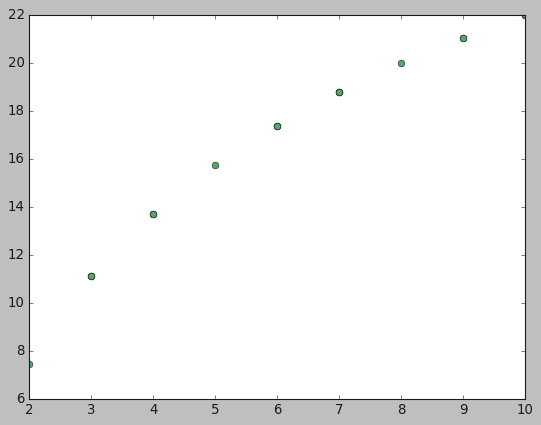

In [91]:
plt.style.use('classic')
plt.plot(delivery_time["Sorting_Time"],model_log_pred,"go")

In [92]:
import numpy as np
model_log_rmse=np.sqrt(np.mean((np.array(delivery_time["Delivery_Time"])-np.array(model_log_pred))**2))
model_log_rmse

2.733171476682066

But still we are not achieved our target R-sq value.
Now, we use exponential transformation.

In [93]:
import statsmodels.formula.api as smf
model_exp=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=delivery_time).fit()
model_exp

In [94]:
model_exp.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [95]:
model_exp.rsquared

0.7109478980584187

In [96]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 24 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                           16:23:49   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model_exp.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [98]:
model_exp_pred=model_exp.predict(pd.DataFrame(delivery_time["Sorting_Time"]))
model_exp_pred

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [99]:
#As we have used log(Delivery_Time) in preparing model so we need to convert it back.
model_exp_predict=np.exp(model_exp_pred)
model_exp_predict

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [100]:
model_exp_rmse=np.sqrt(np.mean((np.array(delivery_time["Delivery_Time"]-np.array(model_exp_predict)))**2))
model_exp_rmse

2.940250323056201

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


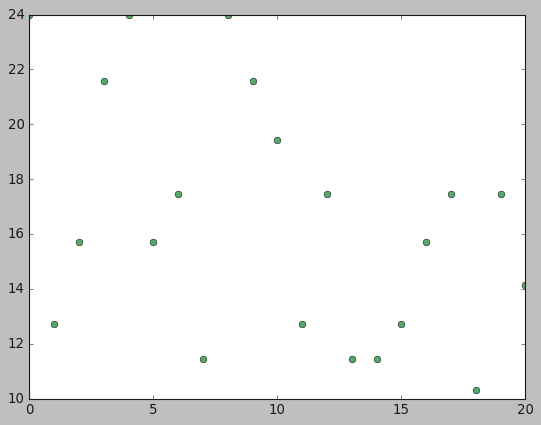

In [101]:
print(plt.style.available)
plt.style.use('classic')
plt.plot(model_exp_predict,"go")
plt.show()

In [102]:
# But still not improve R-sq value.
# So, now square transformation (quadratic model)
delivery_time["Sorting_Time_sq"]=delivery_time["Sorting_Time"]*delivery_time["Sorting_Time"]
delivery_time["Sorting_Time_sq"]

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: Sorting_Time_sq, dtype: int64

In [103]:
model_sq=smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq",data=delivery_time).fit()
model_sq

In [104]:
model_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Mon, 24 Apr 2023   Prob (F-statistic):           2.20e-06
Time:                           16:23:51   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
model_sq.params

Intercept          1.699704
Sorting_Time       0.265922
Sorting_Time_sq   -0.012841
dtype: float64

In [106]:
model_sq.rsquared

0.764866634295373

In [107]:
model_sq_pred=model_sq.predict(delivery_time)
model_sq_pred

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [108]:
model_sq_predict=np.exp(model_sq_pred)
model_sq_predict

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

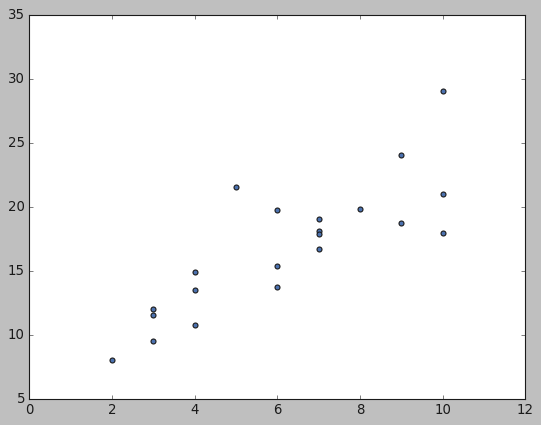

In [109]:
plt.style.use('classic')
plt.scatter(delivery_time["Sorting_Time"],delivery_time["Delivery_Time"])

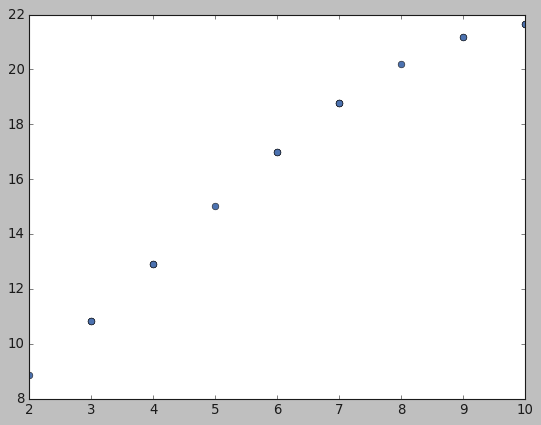

In [110]:
plt.style.use('classic')
plt.plot(delivery_time["Sorting_Time"],model_sq_predict,"bo")

In [111]:
model_sq.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-0.21193528, -0.15476634, -0.0975974 , -0.04042846,  0.01674048,
         0.07390942,  0.13107836,  0.1882473 ,  0.24541624,  0.30258519,
         0.35975413]),
 <BarContainer object of 10 artists>)

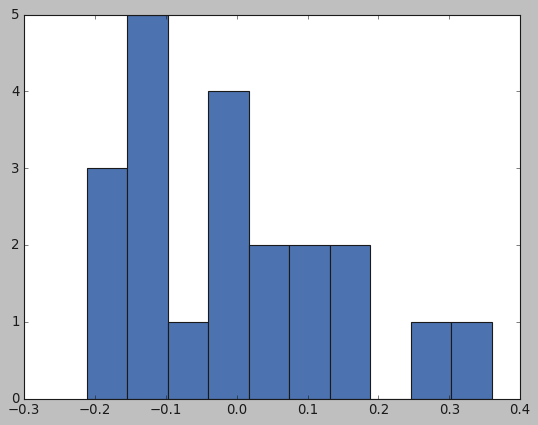

In [112]:
# If we want to see model developed is valid or not, concept call as model validation technique. 
plt.hist(model_sq.resid)

HERE, by using histogram of residuals ,got to know that mean value of residual is zero and variance is constant from the mean value.From this we can say that model developed is valid.

# Conclusion:
 All the four models , in quadratic model we get R-sq value as 0.765 so we reached at our target i.e we get accuracy of model is 76.5%.
 Also, p-value for independent variables is less than alpha=0.05 so all independent variables are significant.
Therefore, out of all 4 models, the last (Quadratic) model is having best R-sq value and it is having lowest error.
 Hence, this is the best model among the 4 models.



# 2) Dataset: Salary_hike 

In [113]:
# importing datset
import pandas as pd
salary_hike=pd.read_csv("Salary_Data.csv")
salary_hike
pd.set_option("Display.min_rows",None)
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [114]:
#EDA

In [115]:
type(salary_hike)

pandas.core.frame.DataFrame

In [116]:
salary_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [117]:
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [118]:
salary_hike.shape

(30, 2)

In [119]:
salary_hike.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [120]:
salary_hike.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [121]:
salary_hike[salary_hike.duplicated()].shape

(0, 2)

In [122]:
salary_hike[salary_hike.duplicated()]

,YearsExperience,Salary


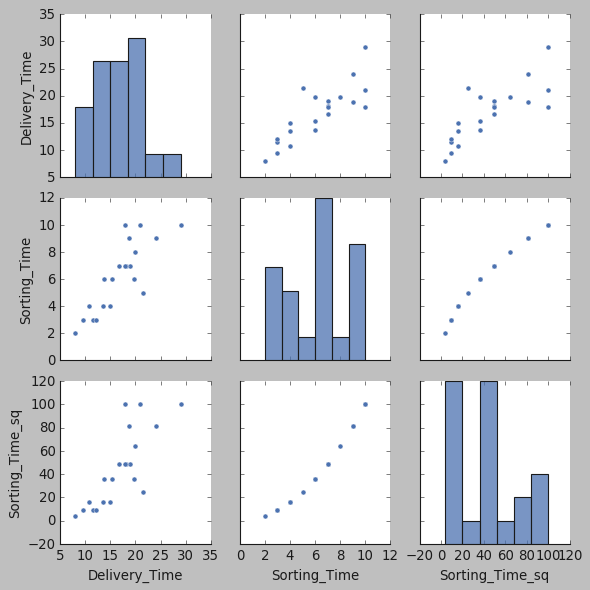

In [123]:
#pairplot
import seaborn as sns
sns.pairplot(delivery_time)

Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:

-Check the kind of each feature distribution

-Check data symmetry

-Verify features frequency

-Identify outliers

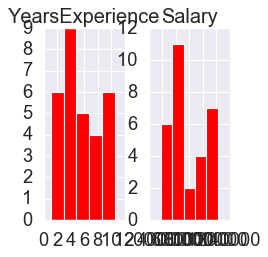

In [124]:
import seaborn as sns
sns.set(style= 'dark', font_scale=1.5, rc= {'figure.figsize':(3,3)})
ax = salary_hike.hist(bins=5, color= 'red')

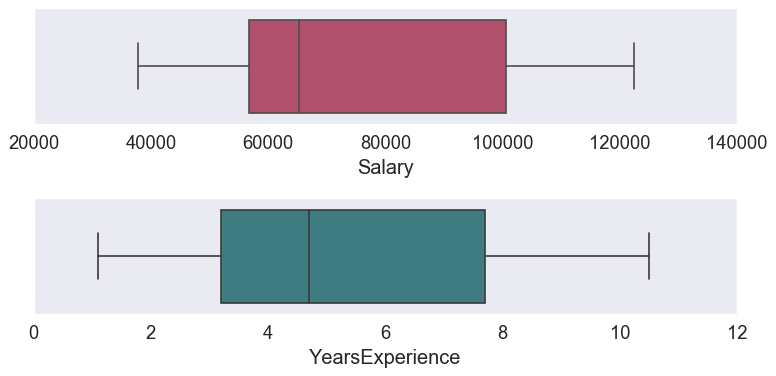

In [125]:
# Plotting boxplot which helps in vizualizing the outliers
import matplotlib.pyplot as plt
outlier = salary_hike.copy() 
fig, axes=plt.subplots(2,1, figsize=(10,5),sharex=False,sharey=False)
sns.boxplot(x='Salary',data=outlier,palette='flare',ax=axes[0])
sns.boxplot(x='YearsExperience',data=outlier,palette='crest',ax=axes[1])
plt.tight_layout(pad=1)

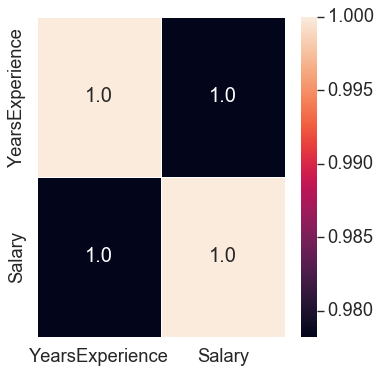

In [126]:
# correlation heatmap
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(salary_hike.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

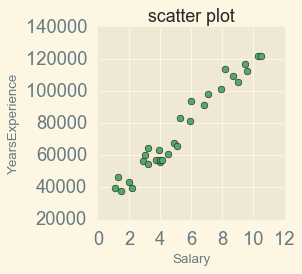

In [127]:
# scatter plot 
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
plt.plot(salary_hike["YearsExperience"],salary_hike["Salary"],"go")
plt.xlabel("Salary")
plt.ylabel("YearsExperience")
plt.title("scatter plot")
plt.show()

here,we can see there is positive correlation and linear association betwen two variables Salary and YearsExperience. 
 Also they are directly proportional to each other i.e as YearsExperience increases Salary is also increases.

In [128]:
# correlation
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


 here, correlation value is 0.978242 so there is very strong correlation.

In [129]:
# linear model fitting 
import statsmodels.formula.api as smf
linear_model1=smf.ols("Salary~YearsExperience",data=salary_hike).fit()
linear_model1

In [130]:
linear_model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [131]:
linear_model1.rsquared

0.9569566641435086

In [132]:
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        16:24:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 here R-sq value is 0.957 i.e 95%

In [133]:
# checking error / residuals in the model
linear_model1.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [134]:
# Giving all the errors.
# we know,
# error= AV-PV

In [135]:
# Predicted value finding 
linear_model_pred1=linear_model1.predict(pd.DataFrame(salary_hike["YearsExperience"]))
linear_model_pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

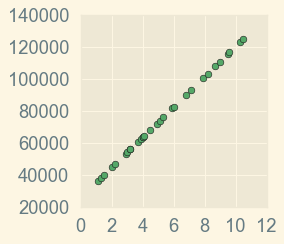

In [136]:
# scatter plot of predicted datapoints
plt.style.use('_classic_test_patch')
plt.plot(salary_hike["YearsExperience"],linear_model_pred1,"go")

In [137]:
# Now, to finding total error, use RMSE (root mean square error)
import numpy as np
linear_model_rmse1=np.sqrt(np.mean((np.array(salary_hike["Salary"])-np.array(linear_model_pred1))**2))
linear_model_rmse1

5592.043608760662

In [138]:
# now i am applying transformation.
# Using log transformation, doing same things that was done in above linear model.

In [139]:
# log transformation model
model_log1=smf.ols("Salary~np.log(YearsExperience)",data=salary_hike).fit()
model_log1

In [140]:
model_log1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [141]:
model_log1.rsquared

0.8538888828756969

In [142]:
model_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.25e-13
Time:                        16:24:03   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
model_log1.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [144]:
model_log_pred1=model_log1.predict(pd.DataFrame(salary_hike["YearsExperience"]))
model_log_pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

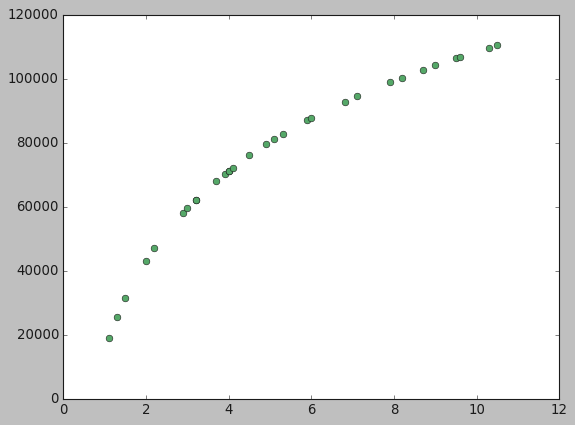

In [145]:
plt.style.use('classic')
plt.plot(salary_hike["YearsExperience"],model_log_pred1,"go")

In [146]:
import numpy as np
model_log_rmse1=np.sqrt(np.mean((np.array(salary_hike["Salary"])-np.array(model_log_pred1))**2))
model_log_rmse1

10302.893706228308

In [147]:
# Now, we use exponential transformation.

In [148]:
import statsmodels.formula.api as smf
model_exp1=smf.ols("np.log(Salary)~YearsExperience",data=salary_hike).fit()
model_exp1

In [149]:
model_exp1.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [150]:
model_exp1.rsquared

0.9319671194084195

In [151]:
model_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           7.03e-18
Time:                        16:24:06   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
model_exp1.resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [153]:
model_exp_pred1=model_exp1.predict(pd.DataFrame(salary_hike["YearsExperience"]))
model_exp_pred1

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [154]:
#As we have used log(Salary) in preparing model so we need to convert it back.
model_exp_predict1=np.exp(model_exp_pred1)
model_exp_predict1

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [155]:
model_exp_rmse1=np.sqrt(np.mean((np.array(salary_hike["Salary"]-np.array(model_exp_predict1)))**2))
model_exp_rmse1

7213.235076620129

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


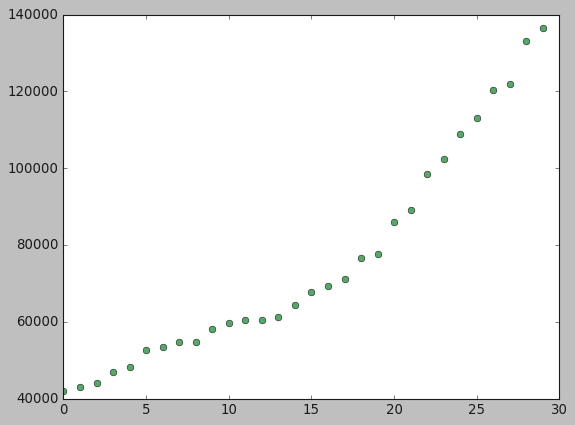

In [156]:
print(plt.style.available)
plt.style.use('classic')
plt.plot(model_exp_predict1,"go")
plt.show()

In [157]:
# now square transformation (quadratic model)
salary_hike["YearsExperience_sq"]=salary_hike["YearsExperience"]*salary_hike["YearsExperience"]
salary_hike["YearsExperience_sq"]

0       1.21
1       1.69
2       2.25
3       4.00
4       4.84
5       8.41
6       9.00
7      10.24
8      10.24
9      13.69
10     15.21
11     16.00
12     16.00
13     16.81
14     20.25
15     24.01
16     26.01
17     28.09
18     34.81
19     36.00
20     46.24
21     50.41
22     62.41
23     67.24
24     75.69
25     81.00
26     90.25
27     92.16
28    106.09
29    110.25
Name: YearsExperience_sq, dtype: float64

In [158]:
model_sq1=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",data=salary_hike).fit()
model_sq1

In [159]:
model_sq1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.95e-18
Time:                        16:24:08   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
model_sq1.params

Intercept             10.336852
YearsExperience        0.202382
YearsExperience_sq    -0.006614
dtype: float64

In [161]:
model_sq1.rsquared

0.948610863848735

In [162]:
model_sq_pred1=model_sq1.predict(salary_hike)
model_sq_pred1

0     10.551469
1     10.588771
2     10.625544
3     10.715161
4     10.750082
5     10.868138
6     10.884475
7     10.916750
8     10.916750
9     10.995124
10    11.025548
11    11.040561
12    11.040561
13    11.055443
14    11.113645
15    11.169730
16    11.196980
17    11.223700
18    11.300686
19    11.313054
20    11.407237
21    11.440373
22    11.522915
23    11.551686
24    11.596993
25    11.622589
26    11.662605
27    11.670211
28    11.719752
29    11.732716
dtype: float64

In [163]:
model_sq_predict1=np.exp(model_sq_pred1)
model_sq_predict1

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

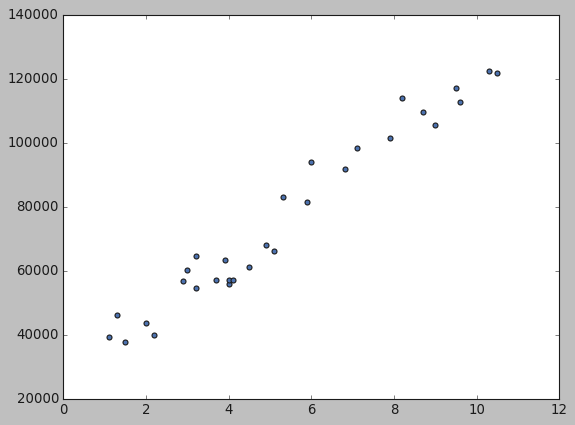

In [164]:
plt.style.use('classic')
plt.scatter(salary_hike["YearsExperience"],salary_hike["Salary"])

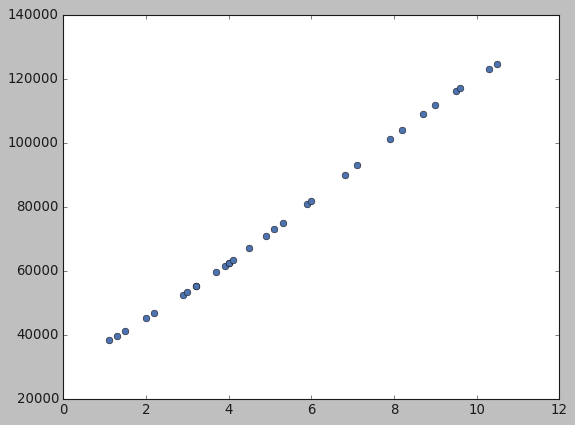

In [165]:
plt.style.use('classic')
plt.plot(salary_hike["YearsExperience"],model_sq_predict1,"bo")

In [166]:
model_sq1.resid

0     0.028604
1     0.152073
2    -0.087306
3    -0.034070
4    -0.156176
5     0.076368
6     0.120122
7    -0.011804
8     0.156817
9    -0.041007
10    0.028796
11   -0.111140
12   -0.090510
13   -0.103216
14   -0.093198
15   -0.043380
16   -0.099130
17    0.103956
18    0.005990
19    0.137358
20    0.019455
21    0.055132
22    0.002946
23    0.090617
24    0.006057
25   -0.055346
26    0.007059
27   -0.038304
28   -0.004776
29   -0.021989
dtype: float64

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-0.15617556, -0.12487627, -0.09357698, -0.06227769, -0.0309784 ,
         0.00032088,  0.03162017,  0.06291946,  0.09421875,  0.12551804,
         0.15681733]),
 <BarContainer object of 10 artists>)

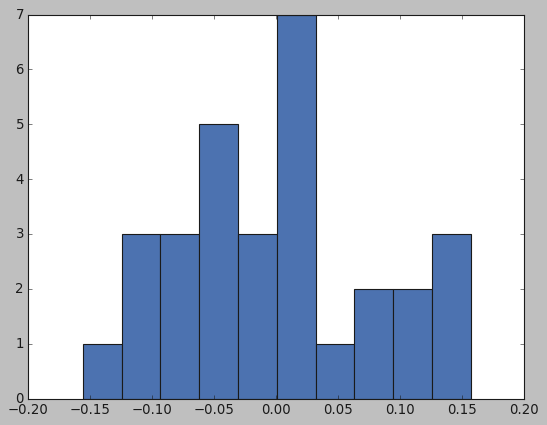

In [167]:
# If we want to see model developed is valid or not, concept call as model validation technique. 
plt.hist(model_sq1.resid)

HERE, by using histogram of residuals ,got to know that mean value of residual is zero and variance is constant from the mean value.From this we can say that model developed is valid.

Conclusion:
All the four models , in linear model we get R-sq value as 0.957 i.e we get accuracy of model is 95.7%.
Also, p-value for independent variables is 0.0000 i.e less than alpha=0.05 so all independent variables are significant.
Therefore, out of all 4 models, the linear model is having best R-sq value and it is having lowest error.
Hence, this is the best model among the 4 models.